In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
Drivers = pd.read_csv("DriverData.csv", encoding = "ISO-8859-1")

In [2]:
Drivers.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


In [3]:
# inspect the structure etc.
print(Drivers.info(), "\n")
print(Drivers.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
id                      54681 non-null int64
city_name               54681 non-null object
signup_os               47824 non-null object
signup_channel          54681 non-null object
signup_date             54681 non-null object
bgc_date                32896 non-null object
vehicle_added_date      13134 non-null object
vehicle_make            13223 non-null object
vehicle_model           13223 non-null object
vehicle_year            13223 non-null float64
first_completed_date    6137 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB
None 

(54681, 11)


In [15]:
Drivers['signup_date'] = pd.to_datetime(Drivers['signup_date'])
Drivers['bgc_date'] = pd.to_datetime(Drivers['bgc_date'])
Drivers['vehicle_added_date'] = pd.to_datetime(Drivers['vehicle_added_date'])
Drivers['first_completed_date'] = pd.to_datetime(Drivers['first_completed_date'])

In [16]:
print(type(Drivers['signup_date'][0]), "\n")
print(Drivers.info(), "\n")

<class 'pandas._libs.tslib.Timestamp'> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
id                      54681 non-null int64
city_name               54681 non-null object
signup_os               47824 non-null object
signup_channel          54681 non-null object
signup_date             54681 non-null datetime64[ns]
bgc_date                32896 non-null datetime64[ns]
vehicle_added_date      13134 non-null datetime64[ns]
vehicle_make            13223 non-null object
vehicle_model           13223 non-null object
vehicle_year            13223 non-null float64
first_completed_date    6137 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(5)
memory usage: 4.6+ MB
None 



In [17]:
Drivers.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT


In [18]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(Drivers.isnull().sum()/len(Drivers.index)), 2)

id                       0.00
city_name                0.00
signup_os               12.54
signup_channel           0.00
signup_date              0.00
bgc_date                39.84
vehicle_added_date      75.98
vehicle_make            75.82
vehicle_model           75.82
vehicle_year            75.82
first_completed_date    88.78
dtype: float64

In [19]:
# summary stats of raised_amount_usd
Drivers['first_completed_date'].describe()

count                    6137
unique                     57
top       2016-01-23 00:00:00
freq                      257
first     2016-01-04 00:00:00
last      2016-02-29 00:00:00
Name: first_completed_date, dtype: object

In [20]:
Drivers['SigntoTrip_Days'] = Drivers['first_completed_date'] - Drivers['signup_date']

In [21]:
Drivers.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,SigntoTrip_Days
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT,NaT
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT,NaT
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03,5 days
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT,NaT


In [22]:
# Distribution
Drivers['SigntoTrip_Days'].describe()

count                       6137
mean     12 days 00:45:03.079680
std       7 days 17:30:26.639917
min              0 days 00:00:00
25%              6 days 00:00:00
50%             11 days 00:00:00
75%             17 days 00:00:00
max             30 days 00:00:00
Name: SigntoTrip_Days, dtype: object

In [35]:
x = (pd.to_timedelta(Drivers['SigntoTrip_Days'],unit='d')+pd.to_timedelta(1,unit='s')).astype('timedelta64[D]')
# Convert series to numpy array
x = x.as_matrix()

In [44]:
y = x[~np.isnan(x)]
print(type(y))
print(y[0:5])

<class 'numpy.ndarray'>
[ 5.  9. 16.  1.  6.]


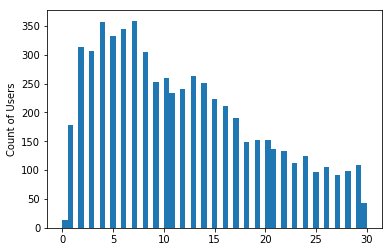

In [48]:
# Histogram - Days between sign up date and first trip completed date
plt.hist(y, bins=57)
plt.ylabel('Count of Users')
plt.show()